In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
import seaborn as sn
import statsmodels.formula.api as sm
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.tools import add_constant
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv('datasets/titanic.csv')

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df = df.drop(['Ticket','Cabin','Name'], axis=1)

In [4]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [5]:
df.dropna()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [36]:
formula = formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp '

In [37]:
df_train = df.iloc[ 0: 600, : ]
df_test = df.iloc[ 600: , : ]

In [38]:
import patsy
from patsy import dmatrices

In [39]:
y_train,x_train = dmatrices(formula, data=df_train,return_type='dataframe')
y_test,x_test = dmatrices(formula, data=df_test,return_type='dataframe')

In [40]:
model = sm.logit(formula, data = df_train)
res = model.fit()

Optimization terminated successfully.
         Current function value: 0.464341
         Iterations 6


In [41]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  474
Model:                          Logit   Df Residuals:                      468
Method:                           MLE   Df Model:                            5
Date:                Wed, 26 Feb 2020   Pseudo R-squ.:                  0.3152
Time:                        14:25:21   Log-Likelihood:                -220.10
converged:                       True   LL-Null:                       -321.42
Covariance Type:            nonrobust   LLR p-value:                 7.697e-42
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.6648      0.516      7.100      0.000       2.653       4.676
C(Pclass)[T.2]    -0.9221      0.339     -2.722      0.006      -1.586      -0.258
C(Pclass)[T.3]    -2.0515      0.328     -6.251      0.000      -2.695      -1.408
C(Sex)[T.male]    -2.5965      0.252    -10.293      0.000      -3.091      -2.102
Age               -0.0365      0.010     -3.750      0.000      -0.056      -0.017
SibSp             -0.3621      0.141     -2.564      0.010      -0.639      -0.085
==================================================================================
"""

In [45]:
from statsmodels.distributions.mixture_rvs import mixture_rvs
from statsmodels.nonparametric import kde


In [47]:
kde_res = kde.KDEUnivariate(res.predict())

In [48]:
kde_res.fit()

Text(0.5, 1.0, 'Distribution of our Predictions')

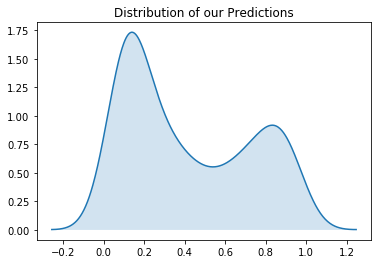

In [49]:
plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support,kde_res.density, alpha=0.2)
plt.title("Distribution of our Predictions")

Text(0.5, 1.0, 'The Change of Survival Probability by Lower Class which is 3rd class')

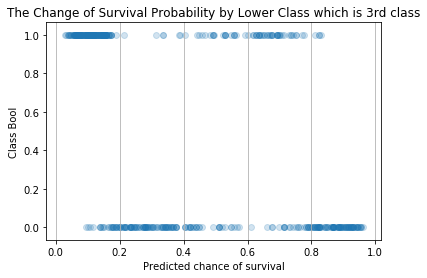

In [51]:
plt.scatter(res.predict(),x_train['C(Pclass)[T.3]'] , alpha=0.2)
plt.xlabel("Predicted chance of survival")
plt.ylabel("Class Bool") # Boolean class to show if its 3rd class
plt.grid(b=True, which='major', axis='x')
plt.title("The Change of Survival Probability by Lower Class which is 3rd class")